### Домашняя работа №4
### Анализ записи сетевой активности.
### Шараев Евгений

Задание к варианту 1.

 1. Каков IP-адрес зараженного узла?
 2. Каков MAC-адрес зараженного узла?
 3. Каково доменное имя зараженного узла?
 4. Какие сайты посетил пользователь зараженного устройства по своему желанию?
 5. Посещение каких сайтов зафиксировано в сетевом трафике?
 6. Каково доменное имя сайта, с которого произошла загрузка вредоносного программного обеспечения?
 7. Каков IP-адрес узла, с которого произошла загрузка вредоносного программного обеспечения?
 8. Загружались ли пользователем или системой без ведома пользователя файлы, не являющиеся вредоносными?
 9. Какие сайты (доменные имена) задействованы в заражении пользователя вредоносным программным обеспечением (имеют следы вредоносной активности, участвуют во вредоносных действиях)?
 10. Каков механизм переходов (перенаправлений) пользователя с посещенных сайтов на сайт, с которого было загружено вредоносное программное обеспечение?

Для исследования дампа сетевого трафика мной были использованы сетевые следующие инструменты:
* ***wireshark*** для поиска, фильтрации, сортировки и чтения пакетов
* ***tcpdump*** для фильтрации пакетов и получения общих статистических сведений
* ***pandas*** для табличного представления и статистической обработки данных 
* ***matplotlib*** и ***plotly*** для визуализации данных 

In [1]:
# Поисследую дамп сетевого трафика утилитой tcpdump

# Всего в дампе 3053 перехваченных пакета
!tcpdump -r var1.pcap --count

reading from file var1.pcap, link-type EN10MB (Ethernet), snapshot length 65535
3053 packets


In [2]:
# Самый первый пакет в дампе был в 10:11:49.324203

!tcpdump -r var1.pcap -v | head

reading from file var1.pcap, link-type EN10MB (Ethernet), snapshot length 65535
10:11:49.324203 IP (tos 0x0, ttl 128, id 482, offset 0, flags [none], proto TCP (6), length 44)
    a-0001.a-msedge.net.http > 172.16.165.165.49433: Flags [S.], cksum 0x21c9 (correct), seq 541339948, ack 922766772, win 64240, options [mss 1460], length 0
10:11:49.324203 IP (tos 0x0, ttl 128, id 483, offset 0, flags [none], proto TCP (6), length 44)
    a-0001.a-msedge.net.http > 172.16.165.165.49432: Flags [S.], cksum 0x4136 (correct), seq 2110835290, ack 2460277736, win 64240, options [mss 1460], length 0
10:11:49.425739 IP (tos 0x0, ttl 128, id 484, offset 0, flags [none], proto TCP (6), length 44)
    a-0001.a-msedge.net.http > 172.16.165.165.49433: Flags [S.], cksum 0x21c9 (correct), seq 541339948, ack 922766772, win 64240, options [mss 1460], length 0
10:11:49.425740 IP (tos 0x0, ttl 128, id 485, offset 0, flags [none], proto TCP (6), length 44)
    a-0001.a-msedge.net.http > 172.16.165.165.49432: Flag

In [3]:
# Ну а самый последний в 10:22:45.512676

!tcpdump -r var1.pcap -v | tail

reading from file var1.pcap, link-type EN10MB (Ethernet), snapshot length 65535
    172.16.165.165.netbios-ns > 172.16.165.2.netbios-ns: UDP, length 68
10:22:41.061276 ARP, Ethernet (len 6), IPv4 (len 4), Request who-has 172.16.165.162 tell 172.16.165.2, length 46
10:22:42.512632 ARP, Ethernet (len 6), IPv4 (len 4), Request who-has 172.16.165.2 tell 172.16.165.165, length 28
10:22:42.512776 ARP, Ethernet (len 6), IPv4 (len 4), Reply 172.16.165.2 is-at 00:50:56:f3:ca:52 (oui Unknown), length 46
10:22:42.512791 IP (tos 0x0, ttl 128, id 5992, offset 0, flags [none], proto UDP (17), length 96)
    172.16.165.165.netbios-ns > 172.16.165.2.netbios-ns: UDP, length 68
10:22:44.012703 IP (tos 0x0, ttl 128, id 5993, offset 0, flags [DF], proto UDP (17), length 96)
    172.16.165.165.netbios-ns > 172.16.165.2.netbios-ns: UDP, length 68
10:22:45.512676 IP (tos 0x0, ttl 128, id 5994, offset 0, flags [DF], proto UDP (17), length 96)
    172.16.165.165.netbios-ns > 172.16.165.2.netbios-ns: UDP, lengt

In [4]:
# По https было перехвачено 591 пакет

!tcpdump 'tcp port 443' -r var1.pcap --count

reading from file var1.pcap, link-type EN10MB (Ethernet), snapshot length 65535
591 packets


In [5]:
# По http на порт 80 было перехвачено 2360 пакетов

!tcpdump 'tcp port 80' -r var1.pcap --count

reading from file var1.pcap, link-type EN10MB (Ethernet), snapshot length 65535
2360 packets


In [6]:
# Сколько всего пакетов по ТСР протоколу

!tcpdump 'tcp' -r var1.pcap --count

reading from file var1.pcap, link-type EN10MB (Ethernet), snapshot length 65535
2951 packets


In [7]:
# ТСР запросы либо на port 80 либо на 443. Картинка сложилась

bool(2360 + 591 == 2951)

True

In [8]:
# Посмотрим сколько TCP пакетов с флагом SYN было перехвачено
# 336 пакетов

!tcpdump 'tcp[tcpflags] & (tcp-syn) != 0' -r var1.pcap --count

reading from file var1.pcap, link-type EN10MB (Ethernet), snapshot length 65535
336 packets


In [9]:
# Посмотрим сколько TCP пакетов с флагом ACK было перехвачено
# 336 пакетов

!tcpdump 'tcp[tcpflags] & (tcp-ack) != 0' -r var1.pcap --count

reading from file var1.pcap, link-type EN10MB (Ethernet), snapshot length 65535
2929 packets


In [10]:
# Посмотрим более расширенную статистику по всем данным в дампе 
# трафика для этого я воспользовался инструментом экспорта 
# дампа pcap в формат csv для более удобной аналитики и статистики

# !sudo wireshark -r var1.pcap

# [sudo] password for evgeny:  ** (wireshark:432543) 20:00:00.182442 [GUI WARNING] 
# -- QStandardPaths: XDG_RUNTIME_DIR not set, defaulting to '/tmp/runtime-root'

# на выходе получил файл traffic.csv
!ls -l

total 1057540
drwxr-xr-x 14 evgeny evgeny       4096 Apr 11 17:06 distorm
drwxr-xr-x 14 evgeny evgeny       4096 Apr 11 17:14 distorm3
drwxr-xr-x  7 evgeny evgeny       4096 Apr  2 11:13 env
-rw-r--r--  1 evgeny evgeny     731447 May 26 10:01 report.pdf
-rw-r--r--  1 evgeny evgeny     548810 Apr 12 12:42 sharaev_evgeny_hw2_2.pdf
-rw-r--r--  1 evgeny evgeny      65119 May 22 18:19 sharaev_evgeny_hw2.ipynb
-rw-r--r--  1 evgeny evgeny     509680 Apr 12 12:42 sharaev_evgeny_hw2.pdf
-rw-r--r--  1 evgeny evgeny    3976800 May 26 11:34 sharaev_evgeny_hw4.ipynb
-rw-r--r--  1 evgeny evgeny      83539 May 25 10:18 tcp_packets.png
-rw-r--r--  1 evgeny evgeny     673501 May 25 10:39 traffic.csv
-rw-r--r--  1 evgeny evgeny    2551397 May 22 17:19 var1.pcap
-rw-r--r--  1 evgeny evgeny 1073741824 May 25  2023 var-1.vmem
drwxr-xr-x  8 evgeny evgeny       4096 Apr 11 16:10 volatility
drwxr-xr-x  8 evgeny evgeny       4096 Apr  2 10:17 volatility3


In [11]:
# Вот первые несколько строк этого файла

!head traffic.csv

"No.","Time","Source","SRC_PORT","Destination","DST_PORT","Protocol","Length","Info","SYN","ACK","FIN","RST","PSH","URG","FILE"
"1","10:11:49.324203","204.79.197.200","80","172.16.165.165","49433","TCP","60","80  >  49433 [SYN, ACK] Seq=0 Ack=1 Win=64240 Len=0 MSS=1460","Set","Set","Not set","Not set","Not set","Not set",""
"2","10:11:49.324203","204.79.197.200","80","172.16.165.165","49432","TCP","60","80  >  49432 [SYN, ACK] Seq=0 Ack=1 Win=64240 Len=0 MSS=1460","Set","Set","Not set","Not set","Not set","Not set",""
"3","10:11:49.425739","204.79.197.200","80","172.16.165.165","49433","TCP","60","[TCP Retransmission] 80  >  49433 [SYN, ACK] Seq=0 Ack=1 Win=64240 Len=0 MSS=1460","Set","Set","Not set","Not set","Not set","Not set",""
"4","10:11:49.425740","204.79.197.200","80","172.16.165.165","49432","TCP","60","[TCP Retransmission] 80  >  49432 [SYN, ACK] Seq=0 Ack=1 Win=64240 Len=0 MSS=1460","Set","Set","Not set","Not set","Not set","Not set",""
"5","10:11:49.530499","204.79.197.200"

In [12]:
import pandas as pd

# Соберу датафрейм из csv файла

df = pd.read_csv("traffic.csv", dtype={'Source': 'string'})
df.head()

No.             Time          Source  SRC_PORT     Destination  DST_PORT  \
0    1  10:11:49.324203  204.79.197.200      80.0  172.16.165.165   49433.0   
1    2  10:11:49.324203  204.79.197.200      80.0  172.16.165.165   49432.0   
2    3  10:11:49.425739  204.79.197.200      80.0  172.16.165.165   49433.0   
3    4  10:11:49.425740  204.79.197.200      80.0  172.16.165.165   49432.0   
4    5  10:11:49.530499  204.79.197.200      80.0  172.16.165.165   49433.0   

  Protocol  Length                                               Info  SYN  \
0      TCP      60  80  >  49433 [SYN, ACK] Seq=0 Ack=1 Win=64240 ...  Set   
1      TCP      60  80  >  49432 [SYN, ACK] Seq=0 Ack=1 Win=64240 ...  Set   
2      TCP      60  [TCP Retransmission] 80  >  49433 [SYN, ACK] S...  Set   
3      TCP      60  [TCP Retransmission] 80  >  49432 [SYN, ACK] S...  Set   
4      TCP      60  [TCP Retransmission] 80  >  49433 [SYN, ACK] S...  Set   

   ACK      FIN      RST      PSH      URG FILE  
0  Set  Not set  Not set  Not set  Not set  NaN  
1  Set  Not set  Not set  Not set  Not set  NaN  
2  Set  Not set  Not set  Not set  Not set  NaN  
3  Set  Not set  Not set  Not set  Not set  NaN  
4  Set  Not set  Not set  Not set  Not set  NaN

In [13]:
# В датафрейме по стобцам распределны следующие данные:

# No - порядковый номер пакета в дампе
# Time - абсолютное время
# Source - IP адрес источника  
# SRC_PORT - порт источника
# Destination - IP адрес получателя
# DST_PORT - порт получателя
# Protocol - название протокола
# Length - длина (размер) пакета
# Info - общие сведения
# SYN, ACK, FIN, RST, PSH, URG, FILE - Наличие tcp флага в сегменте (set/ not set)
# FILE - данные файла (если имеются)


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3053 entries, 0 to 3052
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No.          3053 non-null   int64  
 1   Time         3053 non-null   object 
 2   Source       3053 non-null   string 
 3   SRC_PORT     3024 non-null   float64
 4   Destination  3053 non-null   object 
 5   DST_PORT     3024 non-null   float64
 6   Protocol     3053 non-null   object 
 7   Length       3053 non-null   int64  
 8   Info         3053 non-null   object 
 9   SYN          2951 non-null   object 
 10  ACK          2951 non-null   object 
 11  FIN          2951 non-null   object 
 12  RST          2951 non-null   object 
 13  PSH          2951 non-null   object 
 14  URG          2951 non-null   object 
 15  FILE         36 non-null     object 
dtypes: float64(2), int64(2), object(11), string(1)
memory usage: 381.8+ KB


In [14]:
# Задам каждому Source address свой цвет 
# для дальнейшей визуализации

import matplotlib


sources = df["Source"].unique()
colours = [
    "#FFD700", "#FFA500", "#0000FF", "#00FF00", "#00FFFF",
    "#FFFF00", "#FF0000", "#FF00FF", "#FF1493", "#00FF7F",
    "#8A2BE2", "#ADFF2F", "#20B2AA", "#9932CC", "#FF6347",
    "#40E0D0", "#9370DB"
]

palette = {sources[i]:colours[i] for i in range(len(sources))}
palette

{'204.79.197.200': '#FFD700',
 '131.253.61.84': '#FFA500',
 '172.16.165.165': '#0000FF',
 '172.16.165.2': '#00FF00',
 'fe80::8db6:2c7:a019:4d88': '#00FFFF',
 '82.150.140.30': '#FFFF00',
 '185.53.178.9': '#FF0000',
 '74.125.233.96': '#FF00FF',
 '74.125.233.100': '#FF1493',
 '188.225.73.100': '#00FF7F',
 '37.200.69.143': '#8A2BE2',
 '00:0c:29:fb:9a:bf': '#ADFF2F',
 '172.16.165.254': '#20B2AA',
 '00:50:56:f3:ca:52': '#9932CC',
 'f0:19:af:02:9b:f1': '#FF6347',
 '00:0c:29:fe:9a:67': '#40E0D0',
 '00:50:56:e9:71:c8': '#9370DB'}

In [15]:
# Посчитаем сколько каждый IP адрес источника
# встречался в дампе. Визуализирую полученные данные

import plotly.express as px

frequency = df.groupby(by=["Source"]).size().reset_index(name="Count")
fig = px.bar(
    x=frequency["Source"], 
    y=frequency["Count"], 
    color=frequency["Source"],
    color_discrete_map=palette
)
fig.update_layout(title='График 1. Количество кадров перехваченных по IP адресам')
fig.show()

In [16]:
# Посмотрим визуально какого размера кадры
# проходили в момент захвата трафика

fig = px.scatter(
    x=df['No.'], 
    y=df['Length'],
    color=df['Source'],
    color_discrete_map=palette
)

fig.update_layout(title='График 2. Кадры с учетом их размерности во времени')
fig.show()

**Комментарии**: Размерность кадра отражена в оси Y. Чем выше точка на графике - тем больше длина кадра

На графике видно что среднего размера пакеты передаваоись в меньшей степени. в основном данные передавались пакетами минимального размера или максимального. Причем максимального размера пакеты ходили с 3 основных адресов выделенных на графике желтым, розовым и фиолетовым цветом. Далее я рассмотрб эти источники более подробно. 

In [17]:
# Посмотрим аггрегированные данные объема трафика по IP адресам

sum_length_by_ip = df.groupby(['Source'])['Length'].sum().reset_index()

fig = px.bar(sum_length_by_ip, x='Source', y='Length', color="Source", color_discrete_map=palette)
fig.show()

Из двух предыдущих графиков видно что больше всего данных было передано с трёх хостов (желтый, розовый и фиолетовый): 
* 37.200.69.143
* 74.125.233.96 
* 82.150.140.30

Расмотрим трафик с этих хостов по отдельности. Сначала отфильтрую их от остальных кадров 

In [18]:
# Посмотрим с каких портов были сегменты и 
# какие протоколы использовались

df_37 = df[df.Source == '37.200.69.143']
df_37_protocols = df_37.groupby(['Protocol']).size().reset_index(name='counts')
fig = px.bar(df_37_protocols, x='Protocol', y='counts', color="Protocol")
fig.show()

In [19]:
# Как видно весь трафик с хоста 37.200.69.143 
# (всего 1112 кадров) шёл от исследуемого хоста
# с порта 80, то есть по нешифрованному HTTP протоколу

df_37_ports = df_37['SRC_PORT'].value_counts()
df_37_ports

SRC_PORT
80.0    1112
Name: count, dtype: int64

In [20]:
# Source 74.125.233.96

# А вот с этого источника трафик в основном шифрованый 
# по протоколу TLSv1

df_74 = df[df.Source == '74.125.233.96']
df_74_protocols = df_74.groupby(['Protocol']).size().reset_index(name='counts')
fig = px.bar(df_74_protocols, x='Protocol', y='counts', color="Protocol")
fig.show()

In [21]:
# Трафик в основном шёл с 443 порта который 
# характерен для безопасного https соединения

df_74_ports = df_74['SRC_PORT'].value_counts()
df_74_ports

SRC_PORT
443.0    378
80.0       4
Name: count, dtype: int64

In [22]:
# 82.150.140.30

# Здесь аналогично первому источнику в основном 
# использовался протокол HTTP

df_82 = df[df.Source == '82.150.140.30']
df_82_protocols = df_82.groupby(['Protocol']).size().reset_index(name='counts')
fig = px.bar(df_82_protocols, x='Protocol', y='counts', color="Protocol")
fig.show()

In [23]:
# И соответствующий не безопасному протоколу http
# порт номер 80

df_82_ports = df_82['SRC_PORT'].value_counts()
df_82_ports

SRC_PORT
80.0    260
Name: count, dtype: int64

In [24]:
# Поисследуем распределение IP адресов получателей 

sum_length_by_ip = df.groupby(['Destination'])['Length'].sum().reset_index()

fig = px.bar(sum_length_by_ip, x='Destination', y='Length', color="Destination", color_discrete_map=palette)
fig.show()

#### Ответ на вопрос 1: Каков IP-адрес зараженного узла?
Практически все пакеты были направлялись на хост ***172.16.165.165***. Делаем вывод что это адрес нашего зараженного хоста с которого собирался дамп.

In [25]:
# Ключ ***-е*** утилиты tcpdump выводит заголовки ethernet. 

!tcpdump 'src host 172.16.165.165' -r var1.pcap -e | head -1

reading from file var1.pcap, link-type EN10MB (Ethernet), snapshot length 65535
10:11:49.768188 f0:19:af:02:9b:f1 (oui Unknown) > 00:50:56:f3:ca:52 (oui Unknown), ethertype IPv4 (0x0800), length 811: 172.16.165.165.49435 > 131.253.61.84.https: Flags [P.], seq 1385503808:1385504565, ack 17278809, win 63481, length 757
tcpdump: Unable to write output: Broken pipe


#### Ответ на вопрос 2: Каков MAC-адрес зараженного узла?
Во втором поле видно МАК адрес источника - ***f0:19:af:02:9b:f1***, так как получатель пакета - это хост по адресу 131.253.61.84 (внешняя сеть), то второй МАК адрес 00:50:56:f3:ca:52 - это очевидно локальный сетевой интерфейс шлюза по-умолчанию (роутера)

In [26]:
# Поисследуем все сайты (по IP адресам) какие посещались с зараженного хоста 
# То есть те на которые с адреса 172.16.165.165 уходили TCP запросы с флагом SYN 

syn_addr = df[(df["Source"] == "172.16.165.165") & (df["Protocol"] == "TCP") & (df["SYN"] == "Set")]
syn_addr_agg = syn_addr.groupby(['Destination']).size().reset_index(name='counts')
fig = px.bar(syn_addr_agg, x='Destination', y='counts', color="Destination", color_discrete_map=palette)
fig.show()

Большая часть этих адресов нам уже встречалась. Видим что больше всего запросов уходили примерно равновероятно на те же три адреса из предыдущих графиков. Насколько добровольно это было еще следует выяснить. 

In [27]:
# Посмотрим запросы к ДНС и как эти адреса разрезолвились:

# ssl.bing.com                204.79.197.200
# adultbiz.in                 185.53.178.9
# www.youtube.com             74.125.233.96
# 24corp-shop.com             188.225.73.100
# www.ciniholland.nl          82.150.140.30
# stand.trustandprobaterealty.com  37.200.69.143

# Видим что с адресом 74.125.233.100 ДНС запроса
# во время захвата трафика не было. Но поскольку 
# адрес 74.125.233.96 - это ютуб, то вероятно
# 74.125.233.100 тоже адрес гугловый

!tcpdump 'port 53' -r var1.pcap

reading from file var1.pcap, link-type EN10MB (Ethernet), snapshot length 65535
10:11:50.994963 IP 172.16.165.165.62720 > 172.16.165.2.domain: 51895+ A? ssl.bing.com. (30)
10:11:51.914894 IP 172.16.165.2.domain > 172.16.165.165.62720: 51895 3/0/0 CNAME ssl-bing-com.a-0001.a-msedge.net., CNAME a-0001.a-msedge.net., A 204.79.197.200 (106)
10:11:53.685362 IP 172.16.165.165.51415 > 172.16.165.2.domain: 7601+ A? www.ciniholland.nl. (36)
10:11:54.493624 IP 172.16.165.2.domain > 172.16.165.165.51415: 7601 1/0/0 A 82.150.140.30 (52)
10:11:56.195673 IP 172.16.165.165.60914 > 172.16.165.2.domain: 31133+ A? adultbiz.in. (29)
10:11:56.905440 IP 172.16.165.2.domain > 172.16.165.165.60914: 31133 1/0/0 A 185.53.178.9 (45)
10:11:59.968268 IP 172.16.165.165.52070 > 172.16.165.2.domain: 63336+ A? www.youtube.com. (33)
10:12:00.824825 IP 172.16.165.2.domain > 172.16.165.165.52070: 63336 2/0/0 CNAME youtube-ui.l.google.com., A 74.125.233.96 (83)
10:12:05.810977 IP 172.16.165.165.51871 > 172.16.165.2.domai

#### Ответ на вопрос 5: Посещение каких сайтов зафиксировано в сетевом трафике?

* `ssl.bing.com`
* `adultbiz.in`
* `www.youtube.com`
* `24corp-shop.com`
* `www.ciniholland.nl`
* `stand.trustandprobaterealty.com`

In [28]:
# Попытаюсь восстановить хронологию событий. 
# То есть ответчу на вопрос: в каком порядке
# найденные SYN запросы отправлялись с хоста 


fig = px.scatter(
    x=syn_addr['No.'], 
    y=syn_addr['Destination'],
    color=syn_addr['Destination'],
    size=syn_addr['Length'],
    color_discrete_map=palette
)

fig.update_layout(title='График 2. Кадры с учетом их размерности во времени')
fig.show()

**Комментарии:** Размерность кадра отражена в диаметре окружности точки на графике. Чем больше диаметр тем больше блина кадра. Так как все сегметы с флагом SYN одинаковы по длине то и точки одинаковые.

Теперь мы чётко видим хронологию отправки SYN запросов:

* `ssl.bing.com`
* `www.ciniholland.nl` 
* `adultbiz.in` 
* `www.youtube.com` 
* `24corp-shop.com` 
* `stand.trustandprobaterealty.com` 
* `www.youtube.com` 
* `stand.trustandprobaterealty.com`

*В этом порядке я и буду исследовать сетевой трафик*

In [29]:
# Наложу на этот график вообще все запросы
# отправленные с зараженного хоста

from_source = df[df["Source"] == "172.16.165.165"]

fig = px.scatter(
    x=from_source['No.'], 
    y=from_source['Destination'],
    color=from_source['Destination'],
    size=from_source['Length'],
    color_discrete_map=palette
)

fig.update_layout(title='График 2. Кадры с учетом их размерности во времени')
fig.show()

**Комментарии:** Размерность кадра отражена в диаметре окружности точки на графике. Чем больше диаметр тем больше длина кадра.

На диаграмме отражены только исходящие пакеты от хота `172.16.165.165`. Хорошо видно происходящее: 
* сначала устанавливается соединение с помощью передачи пакетов малого размера 
* затем хост отправляет один или несколько пакетов с запросом большего размера 
* а затем отправляет очень большое количество малых пакетов, которые видимо подтверждаю получение пакетов от сервера (ACK)

Давайте возьмём например все пакеты переданные от зараженного хоста на сервер `www.youtube.com` в отрезке времени от 500-го до 1500-го пакета и раскрасим каждым пакет в зависимости от протокола:

In [30]:
youtube_df = df[
    (df["Source"] == "172.16.165.165") &
    (df["Destination"] == "74.125.233.96") &
    (df["No."] > 500) &
    (df["No."] <= 1500)
]

fig = px.scatter(
    x=youtube_df['No.'], 
    y=youtube_df['Destination'],
    color=youtube_df['Protocol'],
    size=youtube_df['Length']
)

fig.update_layout(title='График 2. Кадры с учетом их размерности во времени')
fig.show()

Небольшие поправки к тому что было отмечено мной выше: 
* сначала отправляется TCP сегмент (SYN для установки соединения)
* затем отправляется HTTP запрос на сервер для получения данных
* потом ответ на получение страниц HTML (ACK как подтверждение доставки)
* Затем зашифрованные сообщения по протоколу TLSv1 и SSLv2 для обмена ключами шифрования
* затем множество ответов с подтверждениями о успешном получении сегментов TCP
* и в конце завершение протокола TLSv1 и пакет TCP о закрытии сессии (FIN)


Ok! Посмотрим как данные шли в обратную сторону от youtube.com к нашему хосту 

In [31]:
from_youtube_df = df[
    (df["Destination"] == "172.16.165.165") &
    (df["Source"] == "74.125.233.96") &
    (df["No."] > 500) &
    (df["No."] <= 1500)
]

fig = px.scatter(
    x=from_youtube_df['No.'], 
    y=from_youtube_df['Destination'],
    color=from_youtube_df['Protocol'],
    size=from_youtube_df['Length']
)

fig.update_layout(title='График 2. Кадры с учетом их размерности во времени')
fig.show()

В обратную сторону картина немного отличается:
* сначала точно также открывается TCP сессия 
* затем сервер шлёт хосту HTTP ответ
* а потом отправляет большие пакеты с данными в зашифрованном виде по протоколу TLSv1
* в конце завершает рукопожатия (FIN)

Трафик с `youtube.com` у меня никаких подозрений не вызывает. продолжу изучение трафика!

Итак, судя по хронологии из Графика 3, первый SYN сегмент (в итмеющемся дампе) отправленный с зараженного хота ушёл на сайт `ssl.bing.com`. Теми же методами изучим входящие от него пакеты.

In [32]:
to_bing_df = df[
    (df["Destination"] == "204.79.197.200")
]

fig = px.scatter(
    x=to_bing_df['No.'], 
    y=to_bing_df['Source'],
    color=to_bing_df['Protocol'],
    size=to_bing_df['Length']
)

fig.update_layout(title='График 2. Кадры с учетом их размерности во времени')
fig.show()

In [38]:
from_bing_df = df[
    (df["Source"] == "204.79.197.200")
]

fig = px.scatter(
    x=from_bing_df['No.'], 
    y=from_bing_df['Destination'],
    color=from_bing_df['Protocol'],
    size=from_bing_df['Length']
)

fig.update_layout(title='График 2. Кадры с учетом их размерности во времени')
fig.show()

На диаграмме видны только два больших `TCP` сегмента `111` и `121`. Как показал из просмотр в программе `wireshark` - это оказались дизассемблированные сообщения из сегмента `TLSv1` под номером `122` в котором был просто обмен сертификатами при рукопожатии. В принципе `ssl.bing.com` - это служба корпорации Майкрософт и пока сильных подозрений не вызывает.

Идём дальше.

Поииследуем трафик с `www.ciniholland.nl`

In [39]:
from_ciniholland_df = df[
    (df["Source"] == "82.150.140.30")
]

fig = px.scatter(
    x=from_ciniholland_df['No.'], 
    y=from_ciniholland_df['Destination'],
    color=from_ciniholland_df['Protocol'],
    size=from_ciniholland_df['Length']
)

fig.update_layout(title='График 2. Кадры с учетом их размерности во времени')
fig.show()

Вижу что от `ciniholland.nl` было много всего интересного в основном в промежутке от снимка 150 до 1000. И видно что были и `TCP` и `HTTP` протоколы. 

#### Поисследуем это всё подробнее в `wireshark`

Вот снимок экрана текста загруженных данных:

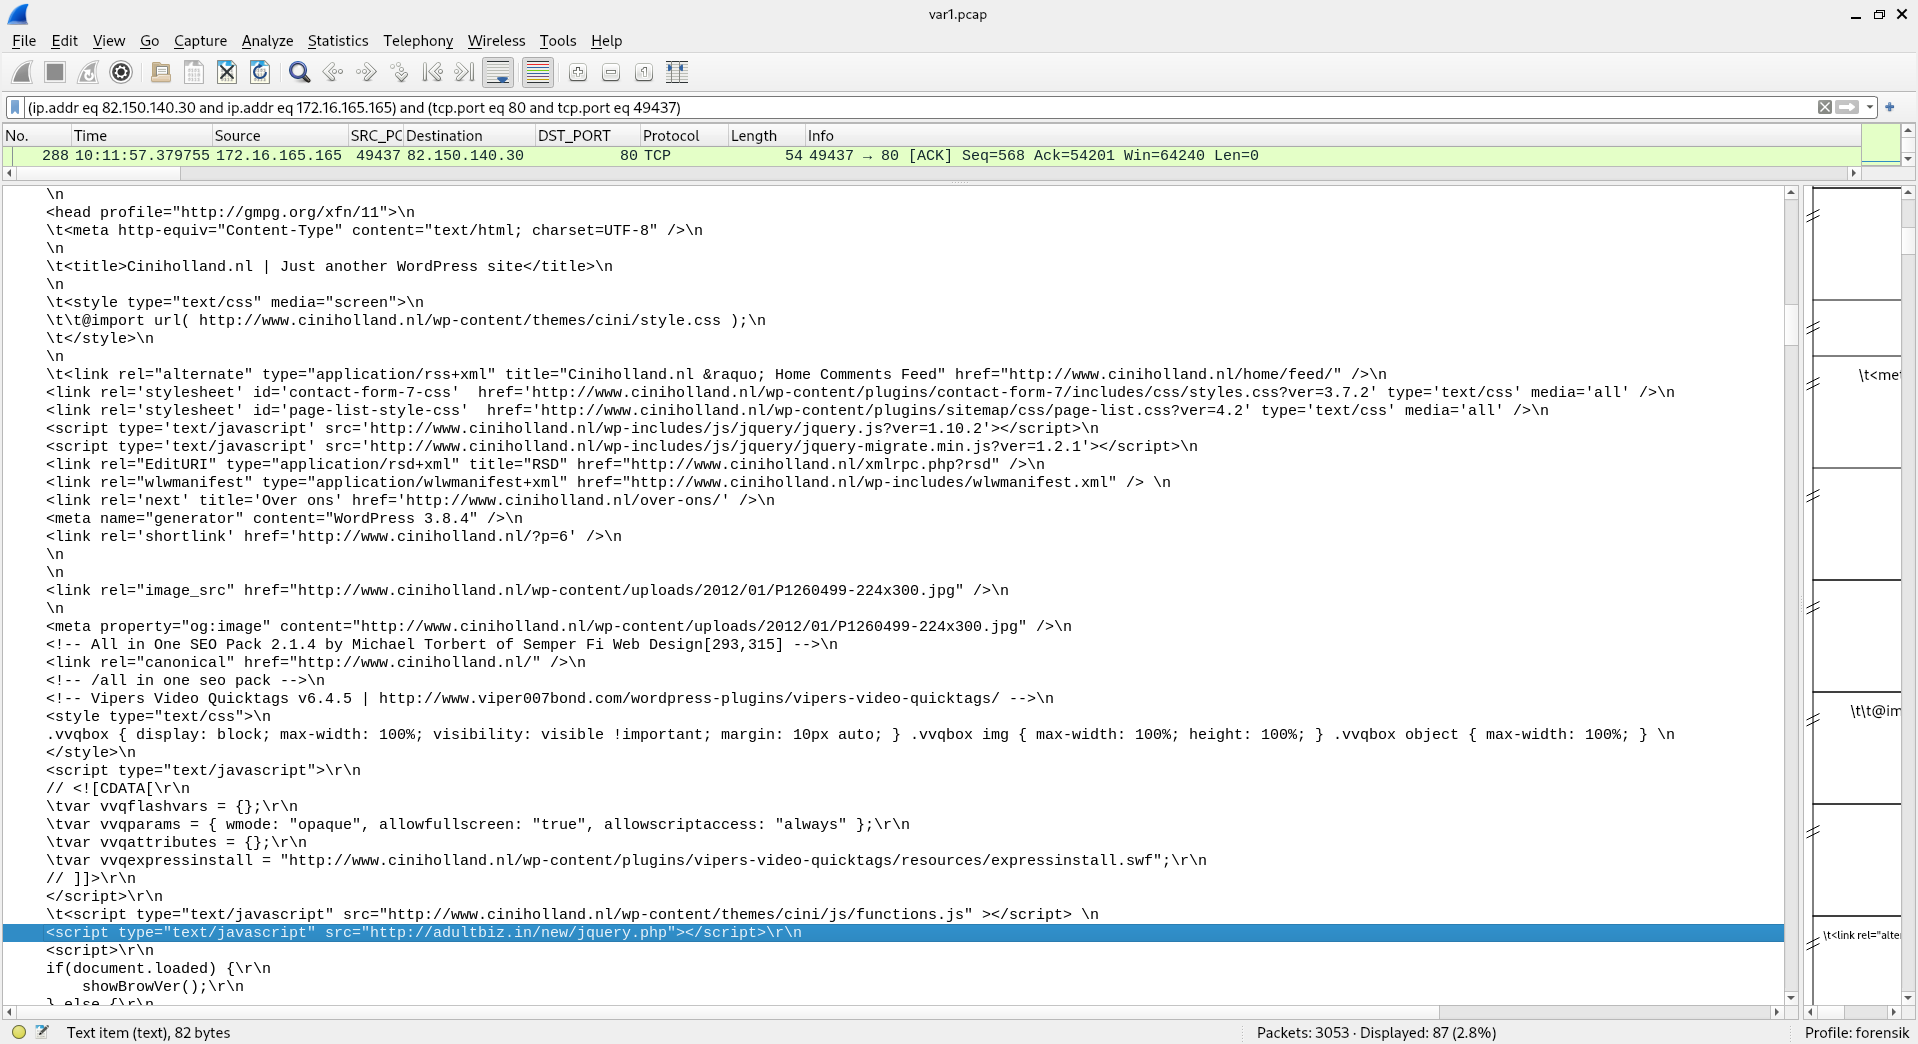

И в увеличенном виде: 

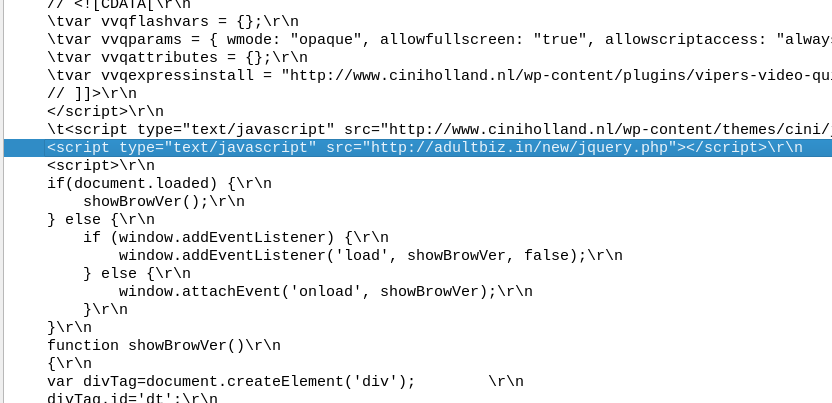

Из исследования данных загружаемых файлов с сайта `ciniholland.nl` видно что скрипты с сайта `adultbiz.in` загружаются автоматически при загрузке страницы, а значит `TCP` запрос с флагом `SYN` на этот сайт (который мы видели ранее на графике хронологии отправки `SYN` запросов с зараженного хоста) был отправлен без явного на то желания клиента.

Далее, мы видим еще более интересные строки:

Клиенту в окне `iframe` показали видео с сайта `youtube.com`, то есть без его на то желания, было обращение к стороннему сайту:

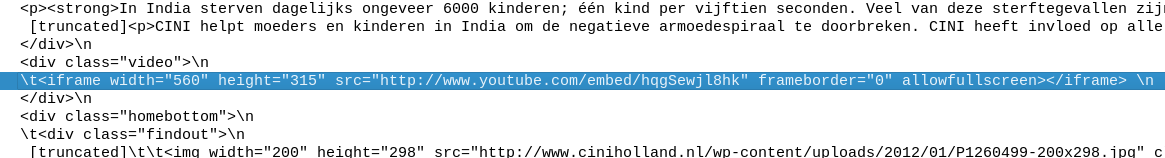

Затем, мы видим следующую логику:

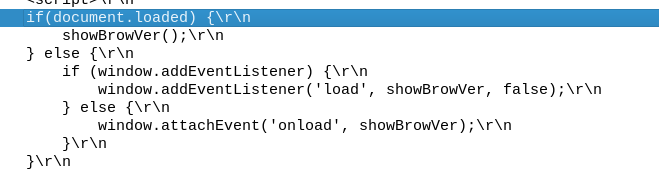

Скрипт на языке JavaScript реализует следующую логику: если страница успела загрузиться то запускается функция `showBrowVer()`, а иначе, создается событие ***запустить `showBrowVer()` после заугрузки страницы (load/onload)*** 

Сама же функция `showBrowVer()` создает тег `div`, крепит его к телу страницы `body`, внутри тега див создаёт тег `iframe` исходный код которого должен якобы загрузиться со страницы `24corp-shop.com`. В действительности же это приводит к вынужденному нежелательному переходу по ссылке.

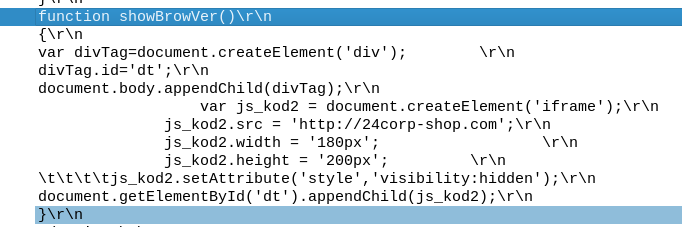

Прочие же данные полученные от `ciniholland.nl` представляют собой огромное количество ссылок и на различные сайты с рекламным материалом, поэтому, весьма вероятно, клиент сразу его покинул и далее, как было видно на диаграмме, никакие `SYN` запросы на `ciniholland.nl` больше не отправлялись. 


**Ответ на вопрос 4**: Какие сайты посетил пользователь зараженного устройства по своему желанию?
Видимо все вышеупомянутые сайты в хронологии, за исключением `adultbiz.in`, `www.youtube.com` и `24corp-shop.com`

Посмотрим что из себя представляет загруженный скрипт `http://adultbiz.in/new/jquery.php`

В первой строке скриншота видно что эту страницу клиент получил имеено по `GET` запросу `new/jquery.php`

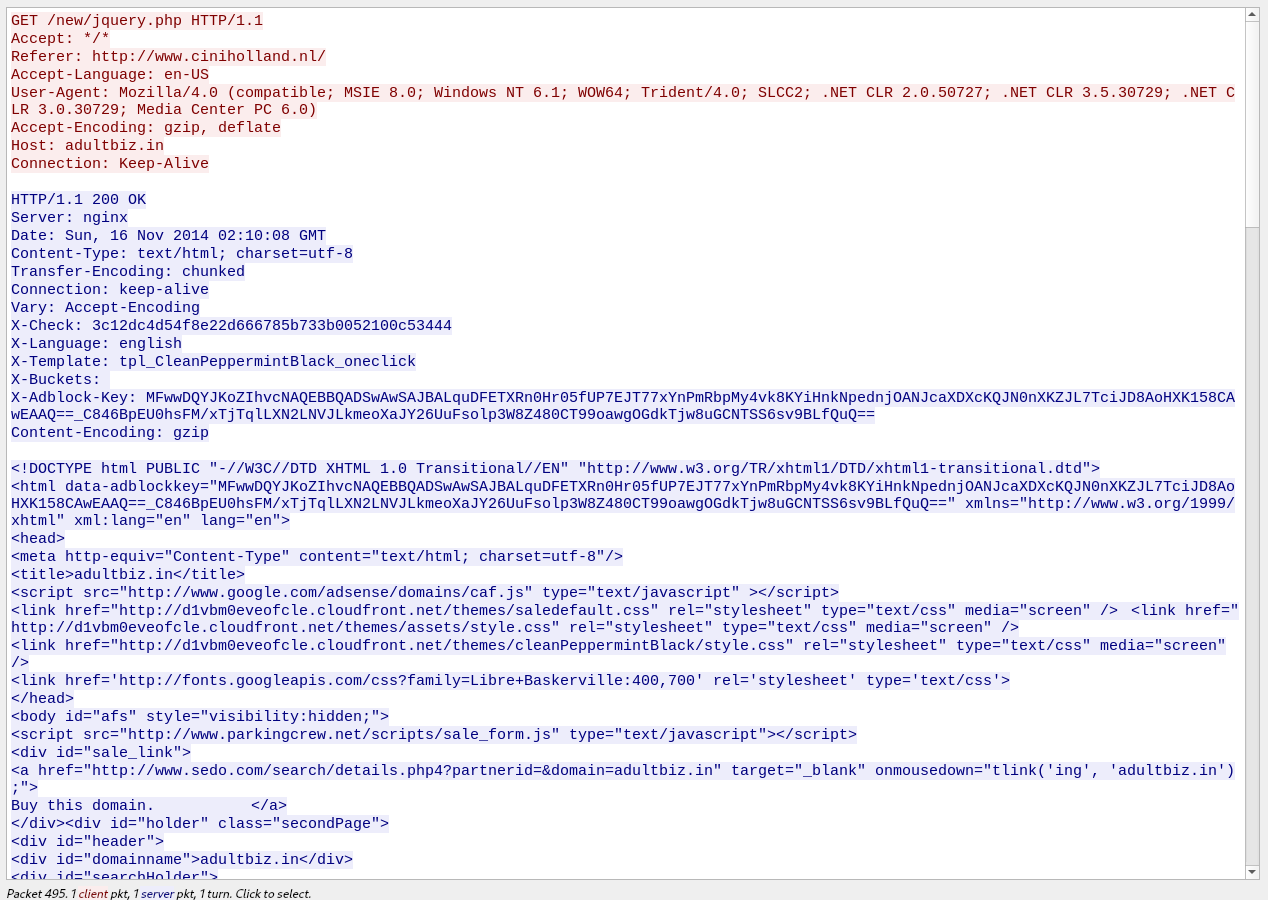
    
Ниже, в теге `body` видно что содержимое всего тела страницы скрыто `style="visibility:hidden;"`
    
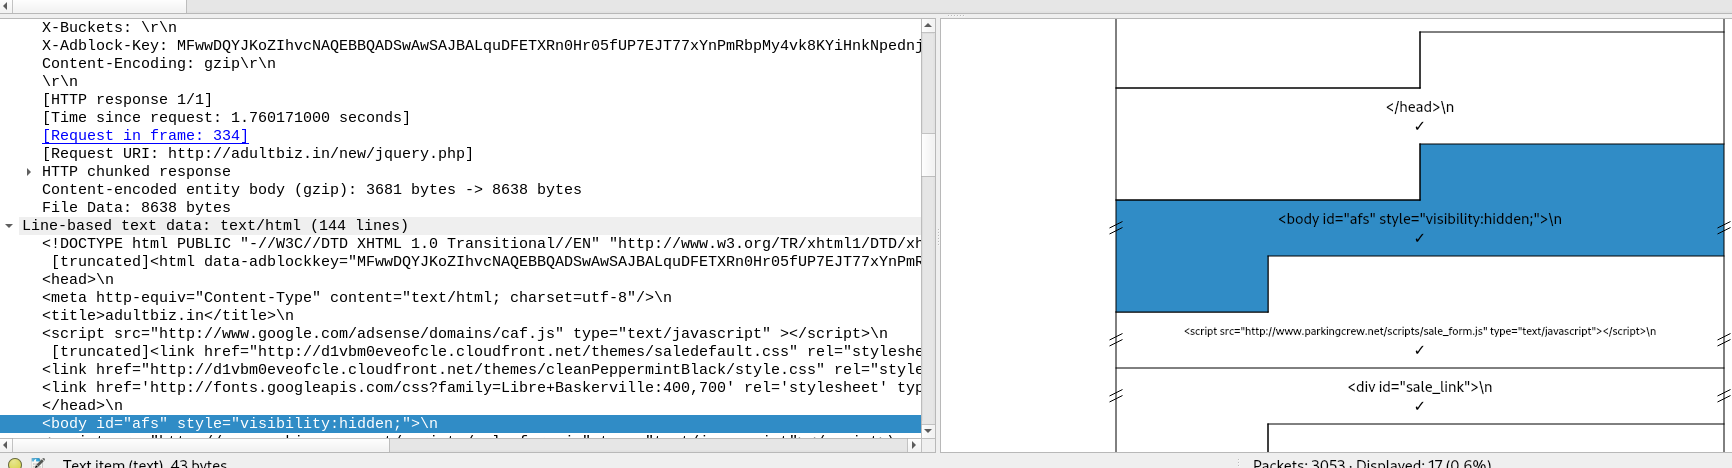

In [43]:
# От adultbiz приходило не так много пакетов
# Всего 3 TCP сегмента которые и составили вышеразобранный скрипт

from_adultbiz_df = df[
    (df["Source"] == "185.53.178.9")
]

fig = px.scatter(
    x=from_adultbiz_df['No.'], 
    y=from_adultbiz_df['Destination'],
    color=from_adultbiz_df['Protocol'],
    size=from_adultbiz_df['Length']
)

fig.update_layout(title='График 2. Кадры с учетом их размерности во времени')
fig.show()

Дальше по хронолдогии следует запрос на `youtube.com`, но я его уже рассмотрел выше, к тому же трафик там приходил исключительно зашифрованый.

Перейдем к следующему по хронологии сайту `24corp-shop.com`. Рассмотрим все сегменты с этого ресурса

In [44]:
from_corp_shop_df = df[
    (df["Source"] == "188.225.73.100")
]

fig = px.scatter(
    x=from_corp_shop_df['No.'], 
    y=from_corp_shop_df['Destination'],
    color=from_corp_shop_df['Protocol'],
    size=from_corp_shop_df['Length']
)

fig.update_layout(title='График 2. Кадры с учетом их размерности во времени')
fig.show()

C `24corp-shop.com` пришло не мало пакетов и в основном `HTML` дробленный на `TCP` сегменты. 

#### Посмотрим на них пристально в `wireshark`

Во первых в теге `body` снова видим старый приём с вложенным `iframe` который отсылает нас на сайт `http://stand.trustandprobaterealty.com` который мы уже видели ранее в отчетах отправки `tcp` запросов с флагом `syn`

По всей видимости и на этот сайт пользователь попал без своего на то желания.

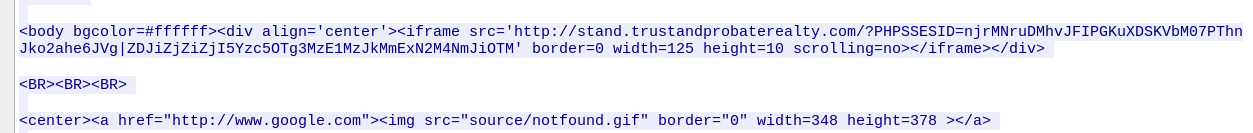

Также в контекте страницы присутствует архивный документ `gzip` с неизвестным содержимым. Поисследуем его позже, а пока отложим в сторонку.

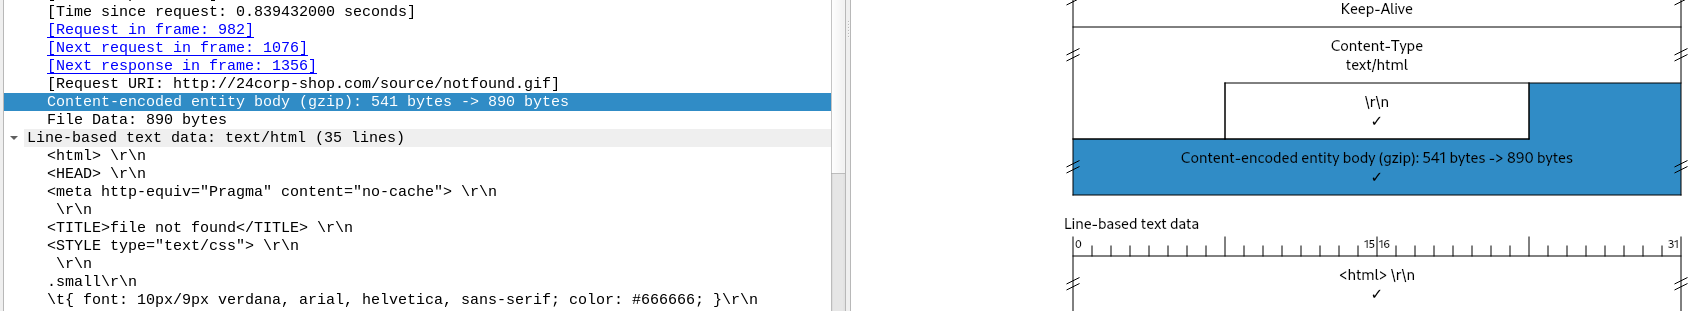

И наконец последний в хронологии сайт `http://stand.trustandprobaterealty.com`

Мной уже было установлено что переход на этот сайт произошел не по желанию пользователя. 

Поисследуем данные которые пришли с этого хоста

In [47]:
# Поисследуем запросы на этот сервер

to_corp_shop_df = df[
    (df["Destination"] == "37.200.69.143")
]

fig = px.scatter(
    x=to_corp_shop_df['No.'], 
    y=to_corp_shop_df['Destination'],
    color=to_corp_shop_df['Protocol'],
    size=to_corp_shop_df['Length']
)

fig.update_layout(title='График 2. Кадры с учетом их размерности во времени')
fig.show()

In [46]:
# Поисследуем данные которые пришли с этого хоста

from_corp_shop_df = df[
    (df["Source"] == "37.200.69.143")
]

fig = px.scatter(
    x=from_corp_shop_df['No.'], 
    y=from_corp_shop_df['Source'],
    color=from_corp_shop_df['Protocol'],
    size=from_corp_shop_df['Length']
)

fig.update_layout(title='График 2. Кадры с учетом их размерности во времени')
fig.show()

На этот сафт было порядка 10 `http` `GET` запросов которые возвращали с сервера множество раздробленных на `TCP` сегменты данных собираемых далее в `HTML` страницы.

#### Посмотрим на них подроблее в программе `wireshark`

Первый потом данные примерно в разрезе времени от `1363` кадра до `1554`, который содержит в контенте архив `gzip`

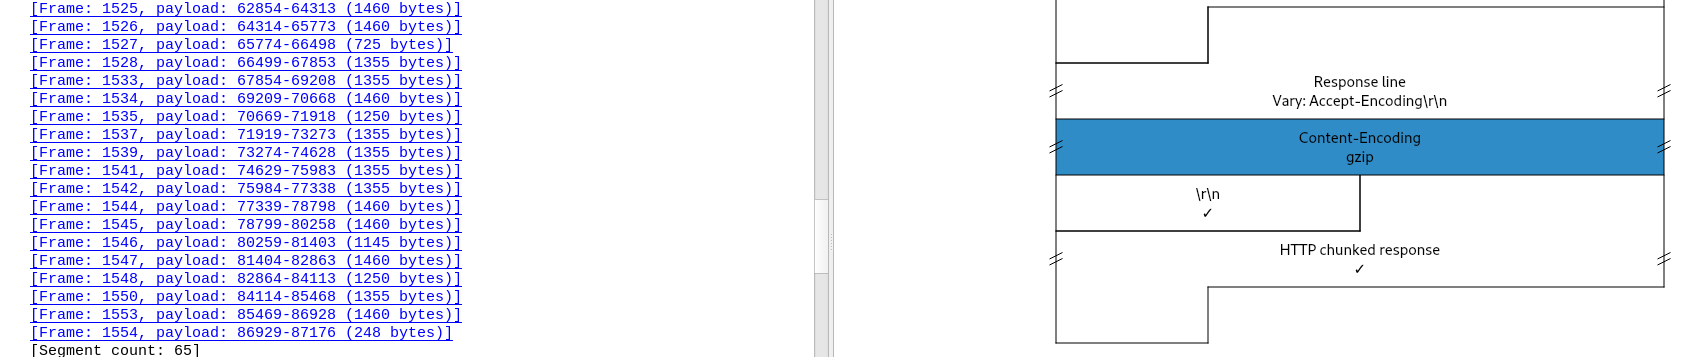

Следующий ответ `HTML` начинается с кадра `1995` и заканчивается на `2379` содержит файл типа `media`

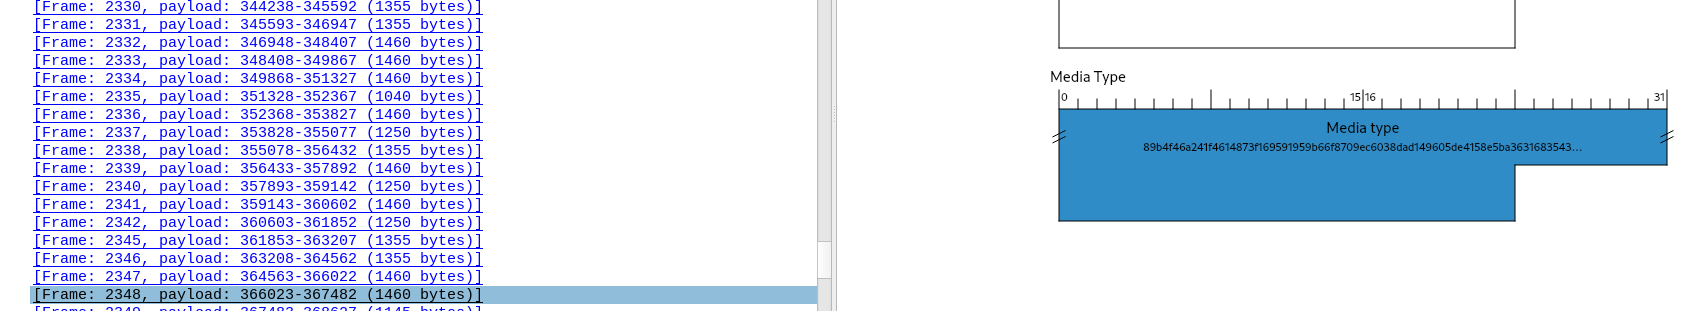

Последний блок данных от фрейма `2534` и до `2977` также несет медиа-контент

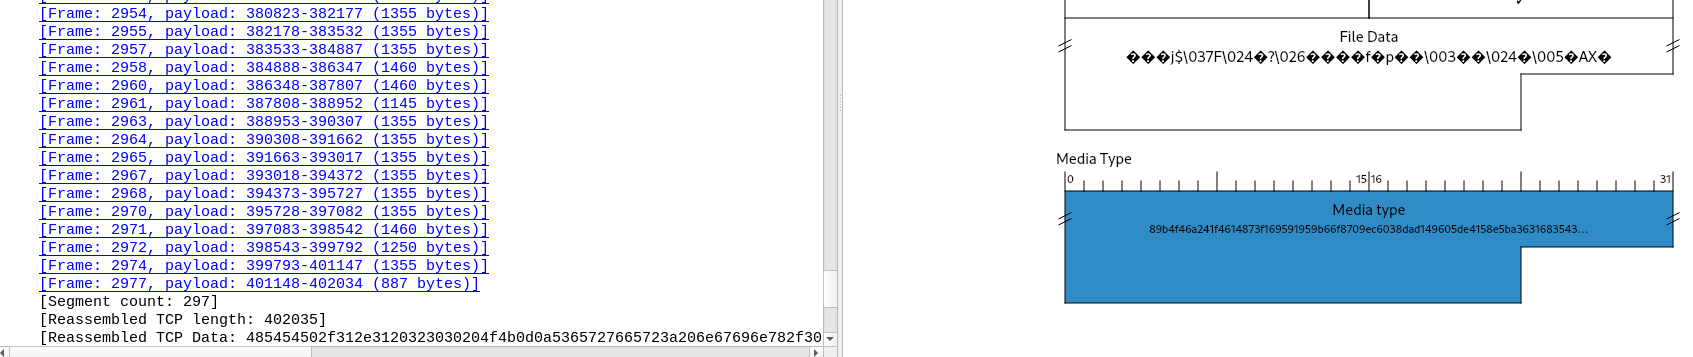




### Анализ вредоносных файлов в virustotal.com

Для сбора данных воспользуюсь штатной утилитой `wireshark` для экспорта объектов:
Загружу их в меню `File` -> `Export Objects` -> `HTTP...`

И загружу все вышеупомянутые мной файлы с подозрительный сайтов `24corp-shop.com` и `stand.trustandprobaterealty.com`

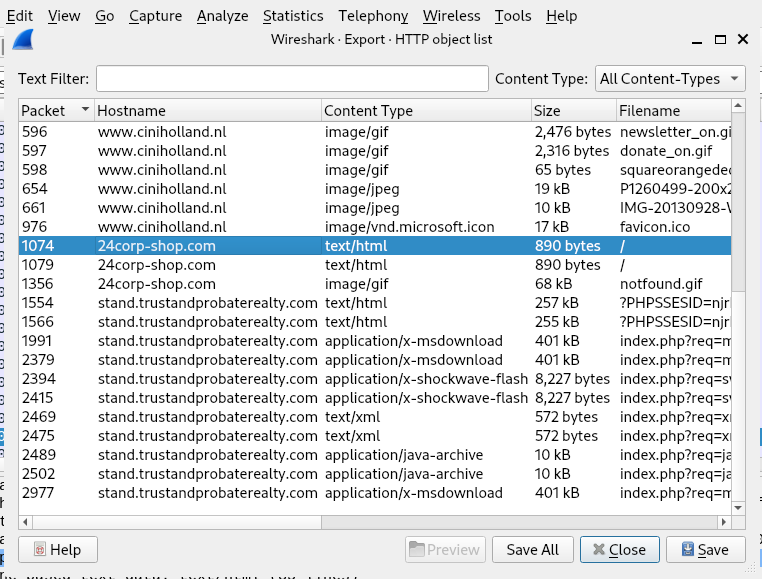

In [19]:
# Файлы с сайта stand.trustandprobaterealty.com 
# и 24corp-shop.com назову именами trust-<No.>, 
# где No. - это номер кадра

!ls -l

total 1061936
-rw-r--r--  1 evgeny evgeny        890 May 26 18:16 24corp-shop-1074
-rw-r--r--  1 evgeny evgeny        890 May 26 18:17 24corp-shop-1079
-rw-r--r--  1 evgeny evgeny      68665 May 26 18:17 24corp-shop-1356
-rw-r--r--  1 evgeny evgeny       8638 May 26 18:21 adultbiz-495
drwxr-xr-x 14 evgeny evgeny       4096 Apr 11 17:06 distorm
drwxr-xr-x 14 evgeny evgeny       4096 Apr 11 17:14 distorm3
drwxr-xr-x  7 evgeny evgeny       4096 Apr  2 11:13 env
-rw-r--r--  1 evgeny evgeny     731447 May 26 10:01 report.pdf
-rw-r--r--  1 evgeny evgeny     548810 Apr 12 12:42 sharaev_evgeny_hw2_2.pdf
-rw-r--r--  1 evgeny evgeny      65119 May 22 18:19 sharaev_evgeny_hw2.ipynb
-rw-r--r--  1 evgeny evgeny     509680 Apr 12 12:42 sharaev_evgeny_hw2.pdf
-rw-r--r--  1 evgeny evgeny    6598457 May 26 18:26 sharaev_evgeny_hw4.ipynb
-rw-r--r--  1 evgeny evgeny      83539 May 25 10:18 tcp_packets.png
-rw-r--r--  1 evgeny evgeny     673501 May 25 10:39 traffic.csv
-rw-r--r--  1 evgeny evgeny     2575

Отправлю все эти файлы по очереди на анализ в сервис VirusTotal. Вот те файлы в которых были обнаружены вредоносные программы:

**24corp-shop-1074** - обнаружена вредоносная ссылка в `iframe` которую я находил ранее

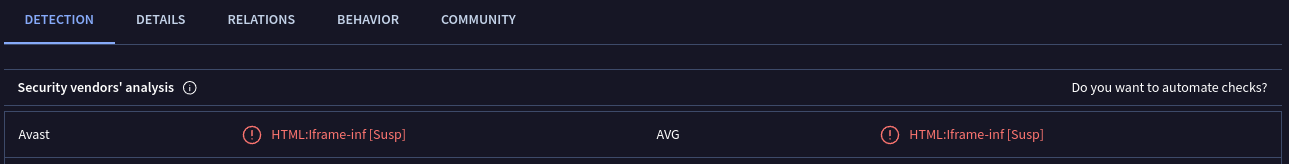

**24corp-shop-1079** - то же самое

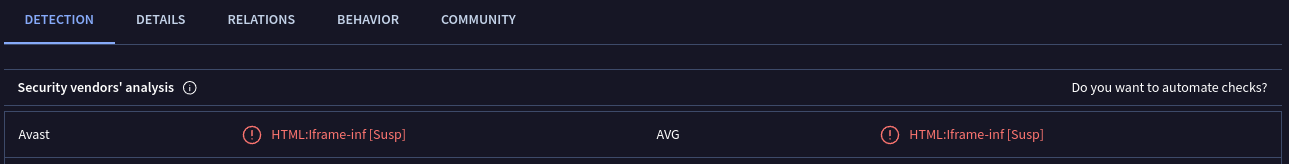


**24corp-shop-1356** - Угроз не обнаружено

**trust-1554** - Обнаружен вирус Троян

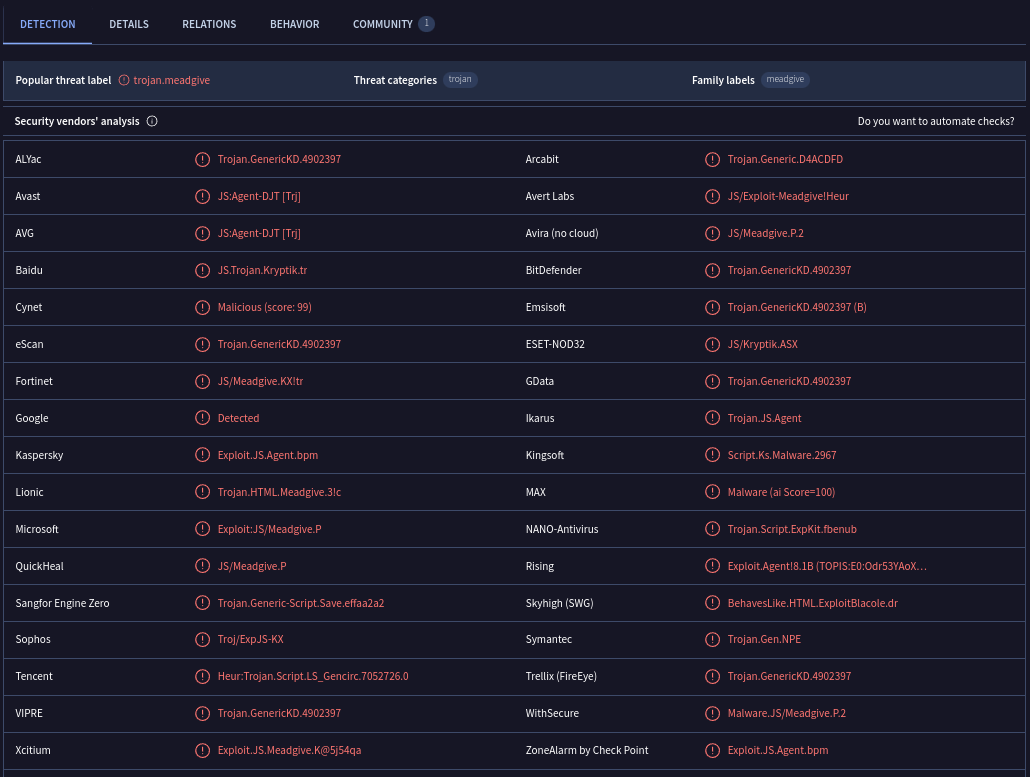

**trust-1566** - Обнаружен вирус Троян

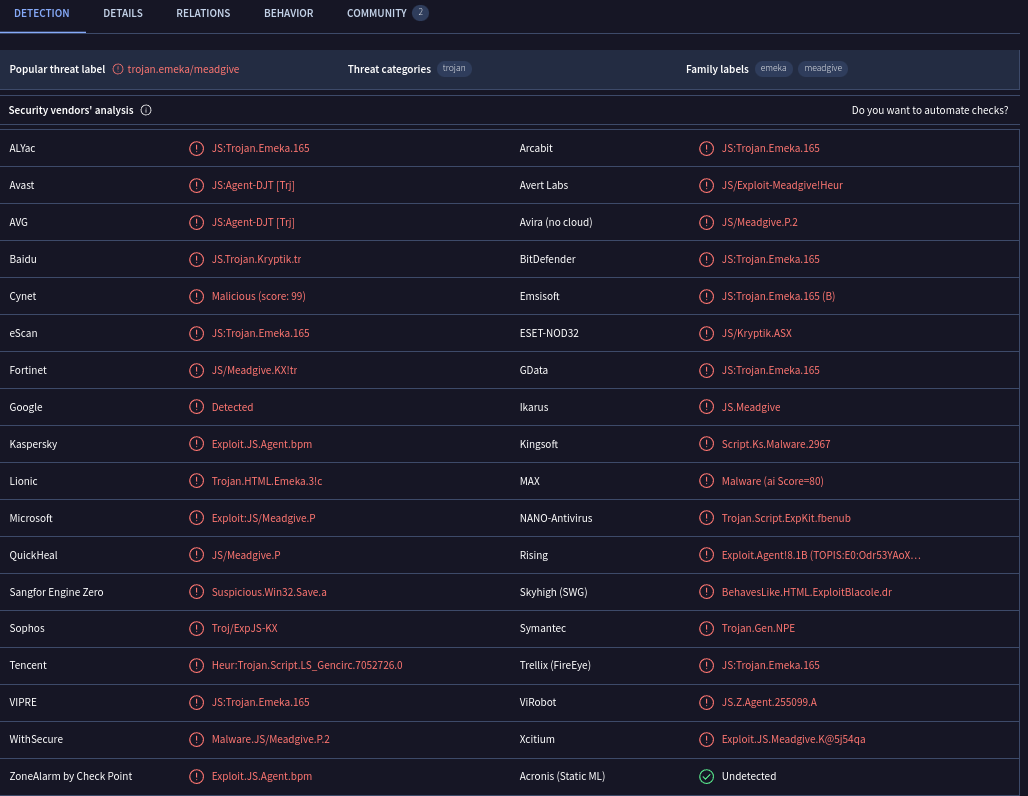

**trust-1991** - Угроз не обнаружено

**trust-2379** - Угроз не обнаружено

**trust-2394** - Обнаружен вредоносный код

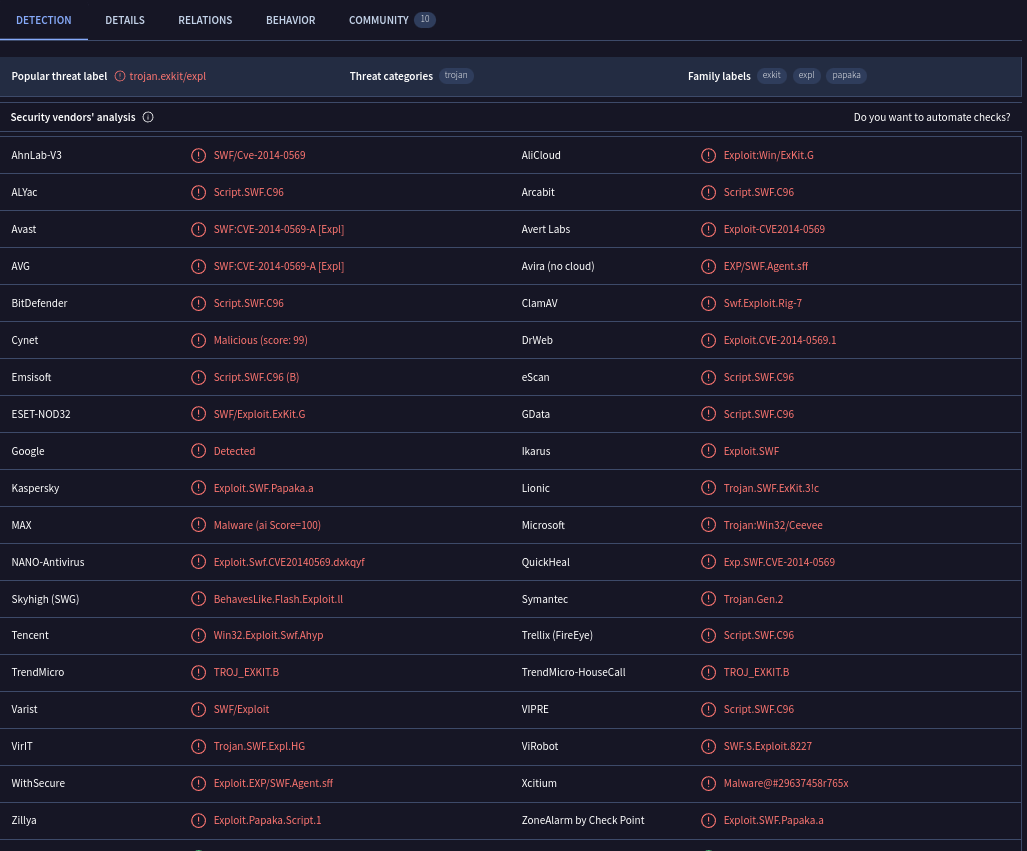

**trust-2415** - Обнаружен вредоносный код

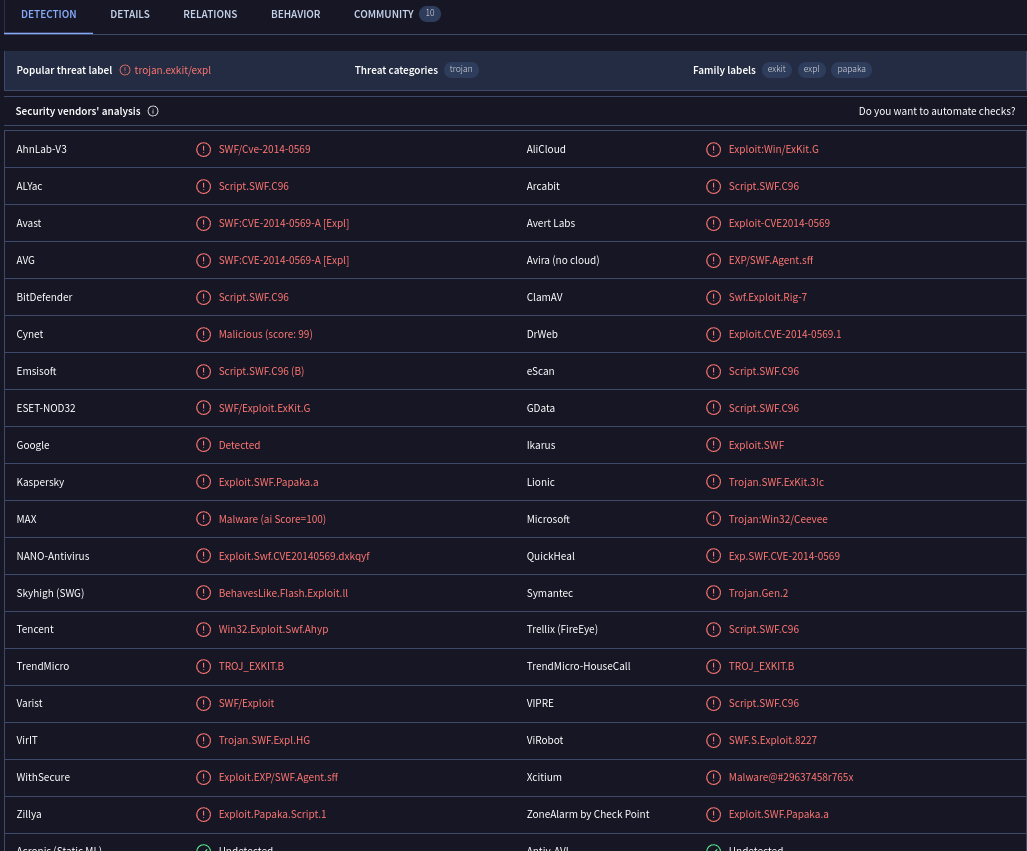

**trust-2469** - Угроз не обнаружено

**trust-2475** - Угроз не обнаружено

**trust-2489** - Обнаружен вирус Троян

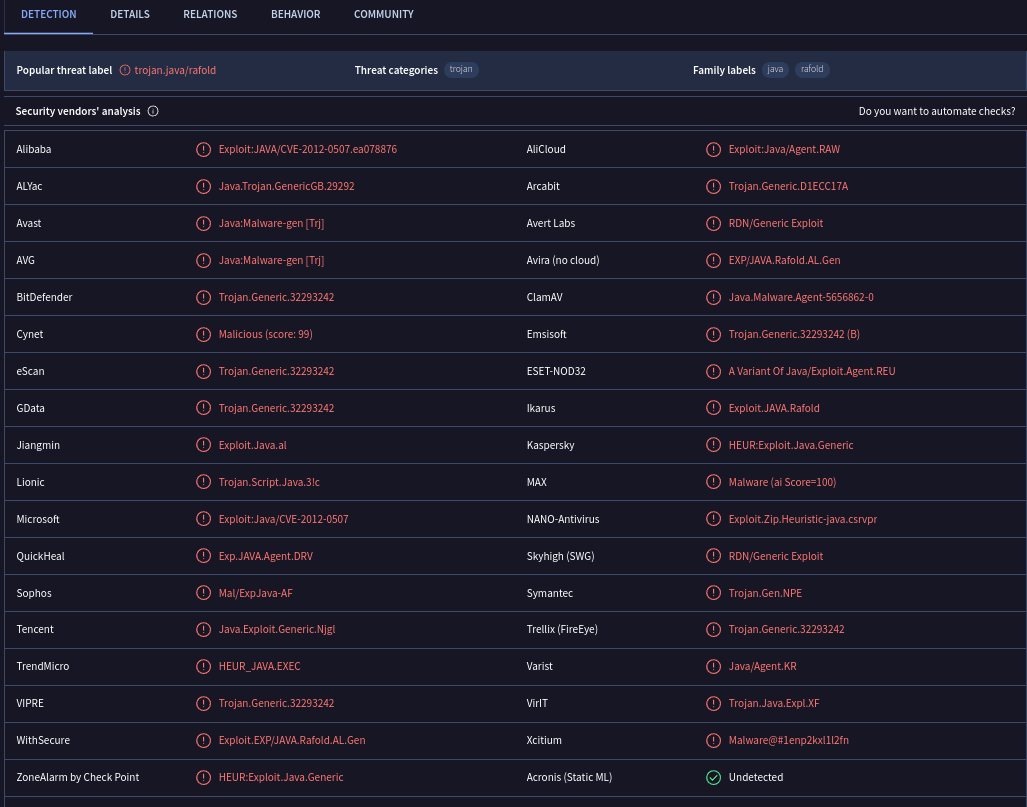

**trust-2502** - Обнаружен вирус Троян

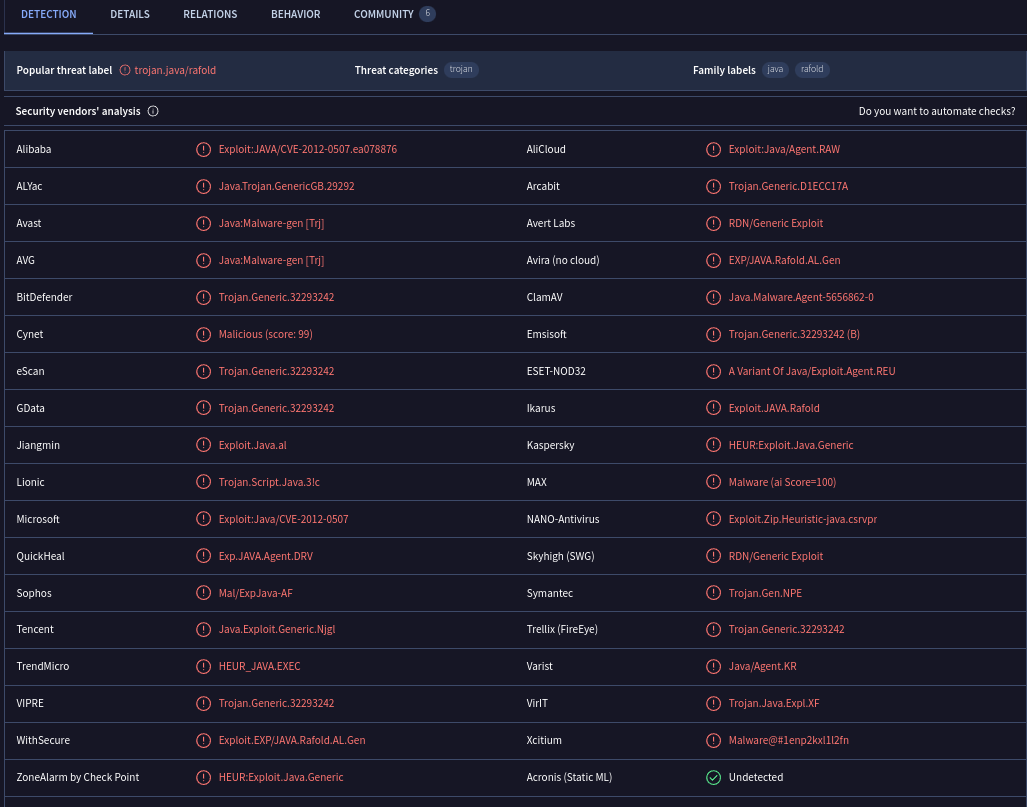

**trust-2977** - Угроз не обнаружено



In [33]:
# ssl.bing.com                204.79.197.200
# adultbiz.in                 185.53.178.9
# www.youtube.com             74.125.233.96
# 24corp-shop.com             188.225.73.100
# www.ciniholland.nl          82.150.140.30
# stand.trustandprobaterealty.com  37.200.69.143

PS:
* Привести в порядок нумерацию графиков